In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from tqdm import tqdm


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset
Run the cell below to donwload the dataset into the console.

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

df = pd.read_csv(filepath)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [3]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [4]:
y_data = df["Price"]
x_data  = df.drop("Price", axis=1)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                    y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples : 24
number of training samples: 214


In [6]:
lre = LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)

print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))

-0.06599437350393789
0.14829792099817973


In [8]:
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)

print("The mean of the folds are", Rcross.mean())
print("The standard deviation is", Rcross.std())

The mean of the folds are -0.16109232388595113
The standard deviation is 0.384957978666471


#### Task 2: Overfitting
Split the data set into training and testing components again, this time reserving 50% of the data set for testing.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.5, random_state=0)

In [10]:
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 Using Test Data')

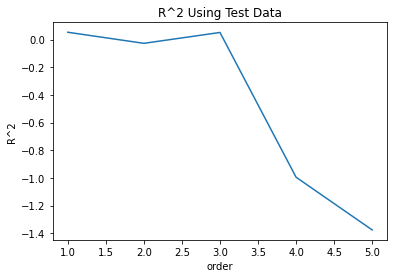

In [12]:

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')

#### Task 3 : Ridge Regression
Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.

In [13]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 
                                       'CPU_core', 'OS', 'GPU', 'Category']])

x_test_pr = pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 
                                     'CPU_core', 'OS', 'GPU', 'Category']])

In [15]:
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(
        x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:01<00:00, 557.34it/s, Test Score=0.423, Train Score=0.669]


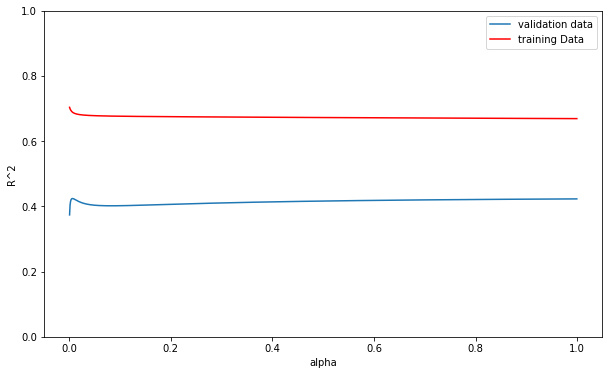

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [17]:
parameters1 = [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [18]:
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [19]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
          'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [20]:
BestRR = Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS','GPU','Category']], y_test))

0.300990504869182
